# Neurônio Sigmóide


In [3]:
%matplotlib inline
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import random

## Funções auxiliares

Estas funções servem para ajudar a analisar o funcionamento do perceptron. Em especial, a função acc_perceptron abaixo retorna a acurácia do perceptron em um conjunto de dados X e rótulos Y. A acurácia é dada por:

$$acc = \frac{\text{acertos}}{\text{acertos}+\text{erros}}$$

Desta forma a acurácia é um número que vai de $0$ a $1$ e indica a proporção de acertos em relação ao número total de exemplos.

In [9]:
#Plota as características feature_idxs (lista com 2 indíces de características)
#X é um vetor onde todos os elementos antes do sep_idxs são da classe 1 e 
#todos de sep_idxs + 1 até o fim são da classe 2.
def plot_features(X, sep_idx, feature_idxs):
    c1 = 'red'
    c2 = 'green'
    
    f1_a = []
    f2_a = []
    f1_b = []
    f2_b = []
    
    for i in X[:sep_idx]:
        f1_a.append(i[feature_idxs[0]])
        f2_a.append(i[feature_idxs[1]])
    
    for i in X[sep_idx + 1:]:
        f1_b.append(i[feature_idxs[0]])
        f2_b.append(i[feature_idxs[1]])   
        
    plt.scatter(f1_a, f2_a, c=c1)
    plt.scatter(f1_b, f2_b, c=c2)

#Retorna a acurácia do perceptron. X e Y são vetores paralelos e w é o vetor de pesos.
def acc_perceptron(X, Y, w):
    hits = float(0)
    misses = float(0)
    for n in xrange(len(X)):
        x_n = X[n]
        d_n = d(Y, n)
        y_n = decision(eval_sigmoid_neuron(x_n, w))
        if (d_n - y_n) == 0:
            hits+=1
        else:
            misses+=1
            
    return hits/(hits+misses)
    

## Implementação do Neurônio Sigmóide

### Treinamento com a descida do gradiente



In [314]:
#Função de decisão: arbitrariamente: x > 0.5 é classe positiva e x <= 0.5 é classe negativa.
def decision(x):
    return 1 if x > 0.5 else -1

#Função d que indica a saída desejada. Note a classe 0 está mapeada para 1, enquanto 
#as outras estão mapeadas para -1
def d(targets, idx):
    return 1 if targets[idx] == 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_dx(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

#Avaliação do neurônio sigmóide
def eval_sigmoid_neuron(x, w):
    return sigmoid(np.dot(x,w))

#Treinamento do neurônio sigmóide
def fit_neuron(X, Y, eta, shuffle=True,w_inicial=None):
    if shuffle:
        s= np.arange(len(X))
        np.random.shuffle(s)
        X = X[s]
        Y = Y[s]
    
    #inicializar vetor de pesos com todos os valores em 0 caso um w_inicial não seja passado.
    w = w_inicial if w_inicial is not None else np.zeros(X.shape[1])
    
    for k in xrange(1):
        for n in xrange(len(X)):
            x_n = X[n]
            y_n = eval_sigmoid_neuron(x_n, w)
            grad = (y_n - d(Y, n)) * (sigmoid_dx(np.dot(x_n,w)) * x_n)
            w = w - eta * grad        
    return w

## Bancada de Testes do Neurônio Sigmóide


vetor de pesos apos o treino: [-0.04037759 -0.45771933  0.04973486]
Acurácia: 0.50


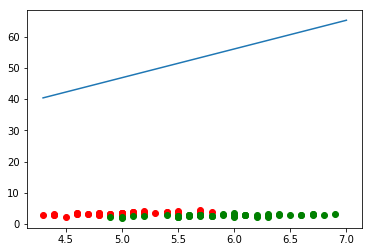

In [315]:
dataset = load_iris()

X = dataset.data
Y = dataset.target

#adicionar a coluna de 1's (bias)
X = np.insert(X, 0, np.array([1] * len(X)), axis=1)

#usar os 100 primeiros exemplos e 2 primeiras características (e o bias na primeira coluna).
#Escolhi os 100 primeiros pq os 50 primeiros são da classe 0 e os próximos 50 são da classe 1.
X = X[:100,:3]
#recuperar também os rótulos dos 100 primeiros exemplos
Y = Y[:100]

#Treinar o perceptron
w = fit_neuron(X, Y, eta=0.1, shuffle=True)
print('vetor de pesos apos o treino: %s' % str(w))

#plotar as features!
plot_features(X, 50, [1,2])

#plotar a fronteira de decisão
xdb = np.linspace(np.min(X[:,1]),np.max(X[:,1]),20)
ydb = map(lambda x: (-w[1]/w[2])*x + (-w[0]/w[2]), xdb)
plt.plot(xdb, ydb)

print('Acurácia: %.2f' % acc_perceptron(X, Y, w))


Acurácia: 0.99


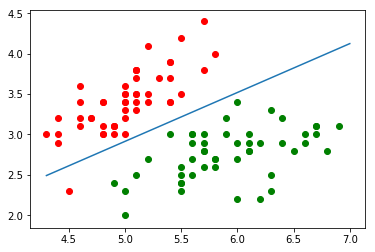

In [339]:
w = fit_neuron(X, Y, eta=0.1, shuffle=True, w_inicial=w)
#plotar as features!
plot_features(X, 50, [1,2])

#plotar a fronteira de decisão
xdb = np.linspace(np.min(X[:,1]),np.max(X[:,1]),20)
ydb = map(lambda x: (-w[1]/w[2])*x + (-w[0]/w[2]), xdb)
plt.plot(xdb, ydb)

print('Acurácia: %.2f' % acc_perceptron(X, Y, w))